In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

# 결측치 문제?
---

- 데이터에 결측치가 있어, 모델의 학습이 되지 않는 문제
- 결측치는 보통 NaN 과 None로 구분된다.
    - NaN : 값이 있어야 하는데 없는 결측치 -> 보통 대체, 추정, 예측 등으로 처리 한다.
    - None : 값이 없는 것 자체가 value인 결측치 -> 보통 새로운 값으로 정의(e.g) 직업 - 백수)하는 방식으로 처리
- 결측치를 처리하는 방법은 간단하다. 하지만 `상황에 맞는 적절한 처리` 가 결측치 문제의 포인트이다.
---
- 경우에 따라서는 음수값이 없는 경우 '-1' 을 입력해 해당 데이터가 포함되지 않도록 하는 방식의 전처리 법도 있다.

# 결측 레코드
----
- 결측치를 포함하는 레코드(data)를 의미
- 결측치 비율 : 결측 레코드 수 / 전체 레코드 수
---
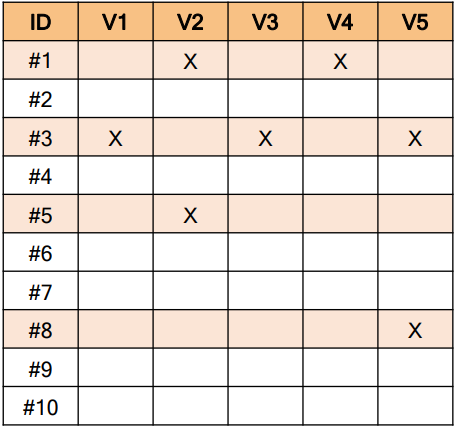

---

- 결측 레코드 : #1, #3, #5, #8 
- 결측치 비율 : 결측 레코드 수(4개) / 전체 레코드 수(10개)
- 변수별 결측치 비율 
    - v1 : 1 / 10 = 0.1
    - v2 : 2 / 10 = 0.2
    - v3 : 1 / 10 = 0.1
    - v4 : 1 / 10 = 0.1
    - v5 : 2 / 10 = 0.2
---

**일반적으로 결측치 비율이 30%(0.3) 이상인 경우 결측치 비율이 높다고 판단한다**
- 단, 무조건적으로 이 비율을 맹신하지 말고, 데이터의 sample수에 따라 적절히 판단할 필요가 있다.

# 관련 함수 1 : Series / DataFrame.isnull()
---
- 값이 결측이면 True, 결측이 아니면 False를 return (notnull 함수와 반대)
- 단순히 isnull만 사용하면 정확한 개수 확인이 어려움 -> isnull.sum() 으로 결측치 분포 확인하는데 활용
---
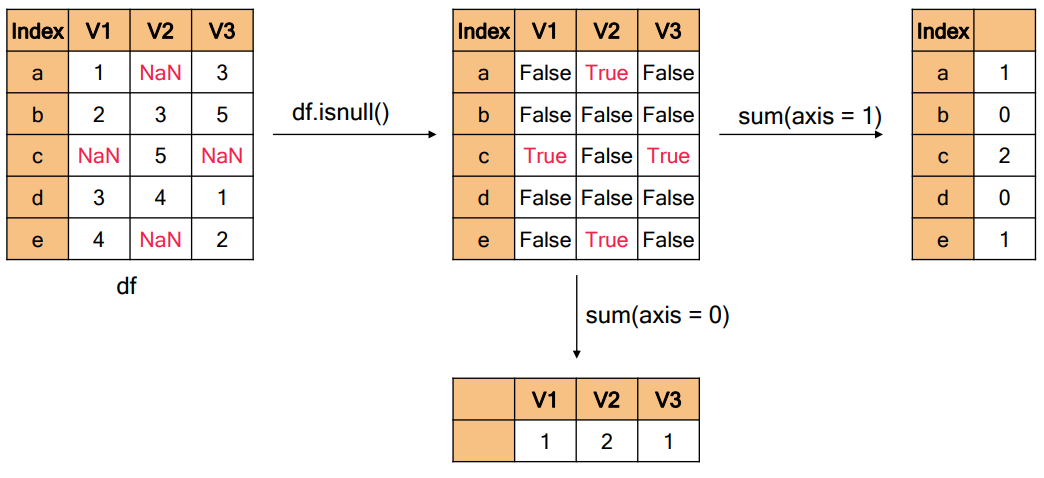

# 관련 함수 2 : DataFrame.dropna()
---
- 결측치가 포함된 행이나 열을 제거하는 함수

파라미터
- axis = 1 은 결측이 포함된 '열' 을 삭제
- axis = 0 은 결측이 포함된 '행' 을 삭제
- how = 'any' 는 결측이 1개라도 있으면 해당 레코드를 삭제 (일반적으로 사용)
- how = 'all' 은 모든값이 결측인 경우에만 해당 레코드를 삭제 

# 결측치 삭제
---

- 결측의 삭제는 항상 `Train data` 를 기준으로 하는 전처리 작업이다.
- 따라서 sample데이터를 X(변수), Y(label)로 나누고 train 데이터와 test데이터로 나눈 후에 전처리를 한다.
- Train data에 전처리 작업을 해주었다면, 동일 기준으로 Test data에도 전처리 작업을 해주어야 한다.

## 행 단위 삭제
---
- 2가지 조건을 만족하는 경우에만 삭제를 할 수 있다.


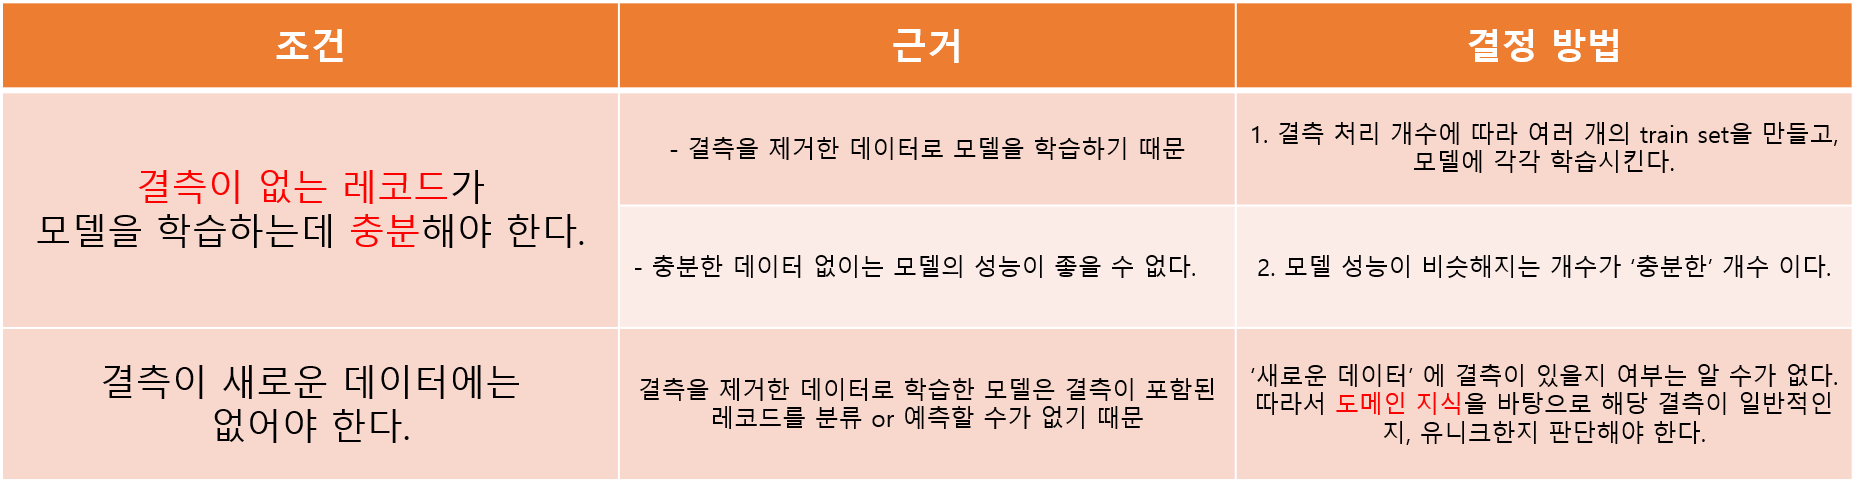

---

In [2]:
# 데이터 불러오기
df = pd.read_csv("mammographic.csv")
df

,BI-RADS,Age,Shape,Margin,Density,Output
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [3]:
# 특징과 라벨 분리
X = df.drop('Output', axis = 1)
Y = df['Output']

In [4]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [5]:
Train_X.isnull().sum(axis = 0) # 열별 결측치 개수 확인

BI-RADS     2
Age         3
Shape      26
Margin     38
Density    63
dtype: int64

In [6]:
Train_X.isnull().sum(axis = 0) / len(Train_X) # 열별 결측치 비율 확인
# 결측이 전체적으로 많은 편이 아니나, 모든 컬럼에 결측이 1회 이상 발생 => 열 삭제 불가

# 이 경우 결측치 처리를 한다면 결측이 있는 '행' 자체를 모두 삭제하는 방법이 가장 일반적

BI-RADS    0.002778
Age        0.004167
Shape      0.036111
Margin     0.052778
Density    0.087500
dtype: float64

Train data의 결측치 제거

In [7]:
Train_X.dropna(inplace = True) # 결측이 포함된 레코드 제거
# Train_X = Train_X.dropna() # inplace True가 default

Test data의 결측치 제거

In [8]:
Test_X.dropna(inplace = True) # 결측이 포함된 레코드 제거 (주의: 새로 들어온 레코드의 결측이 있으면 처리하지 못함을 의미)

## 열 단위 삭제
---

- 마찬가지로 2가지 조건을 만족하는 경우에만 삭제할 수 있다.

1) 소수 변수에 결측이 많이 포함되어 있을 때 (e.g) sample이 1만개인데, 한 컬럼에만 결측치가 몇천개인 경우)

2) 해당 변수들이 크게 중요하지 않을때 (도메인 지식으로 판단)

In [9]:
# 데이터 불러오기
df = pd.read_csv("post_operative.csv")
df.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,Decision
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,?,S
2,high,low,excellent,high,stable,stable,mod-stable,?,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,?,A


In [10]:
# 특징과 라벨 분리
X = df.drop('Decision', axis = 1)
Y = df['Decision']

In [11]:
# 학습 데이터와 평가 데이터 분할
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [12]:
Train_X.head() # COMFORT 변수에 '?'로 결측이 표시되어 있음을 확인

# 결측치 인데 별도의 문자로 표현을 한 경우 => 삭제

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT
85,mid,mid,excellent,mid,unstable,stable,stable,10
74,mid,low,excellent,high,stable,stable,mod-stable,?
39,mid,mid,good,high,unstable,stable,mod-stable,10
82,mid,low,good,mid,stable,stable,unstable,10
64,high,mid,excellent,mid,unstable,unstable,unstable,10


운이 좋게 head()로 ?를 발견했지만, 그렇지 않을 경우도 있으므로 항상 unique() 함수를 통해 각 컬럼의 값들을 확인해 보는 것이 좋다.

In [13]:
Train_X['COMFORT'].unique()

array(['10', '?', '15', '5'], dtype=object)

In [14]:
# 결측치 비율 확인

import numpy as np
# 결측이 '?'로 표시되어 있음 => 데이터에 대한 이해가 없으면 적절히 처리가 안될 수 있음
Train_X.replace('?', np.nan).isnull().sum() / len(Train_X)

L-CORE       0.000000
L-SURF       0.000000
L-O2         0.000000
L-BP         0.000000
SURF-STBL    0.000000
CORE-STBL    0.000000
BP-STBL      0.000000
COMFORT      0.283582
dtype: float64

In [15]:
# 모든 결측이 COMFORT에 쏠렸으며(거의 0.3에 근접), 해당 변수가 중요하지 않다는 도메인 지식 기반 하에(가정) 삭제
Train_X.dropna(axis = 1, inplace = True)




# Test_X의 COMFORT에는 결측이 없을 수도 있으므로(이 경우 컬럼 삭제가 되지 않음), drop을 이용하여 삭제
Test_X.drop('COMFORT', axis = 1, inplace = True) 

# 방법 2
# Test_X = Test_X[Train_X.columns]
# 이미 Train_X 는 drop이 진행된 상태이기 때문에, Train_X의 컬럼과 동일한 컬럼인 Test_X의 값만을 입력하도록 update할 수도 있다.

In [16]:
# 결과 확인
Train_X.isnull().sum(axis = 0)

L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      0
dtype: int64